# Trajectory-wise analyses

In this tutorial, we will use trajectory wise analysis to expore regulatory mechanisms of hematopoiesis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Scribe as sb
import sys
import os

# import scanpy as sc
import dynamo as dyn
import seaborn as sns

# filter warnings for cleaner tutorials
import warnings
warnings.filterwarnings('ignore')

dyn.dynamo_logger.main_silence()


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
adata_labeling = dyn.sample_data.hematopoiesis()


take a glance at what is in `adata` object. All observations, embedding layers and other data in `adata` are computed within `dynamo`. Please refer to other dynamo tutorials regarding how to obtain these values from metadata and raw new/total and (or) raw spliced/unspliced gene expression values.

In [3]:
adata_labeling


AnnData object with n_obs × n_vars = 1947 × 1956
    obs: 'batch', 'time', 'cell_type', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'acceleration_pca', 'curvature_pca', 'n_counts', 'mt_frac', 'jacobian_det_pca', 'manual_selection', 'divergence_pca', 'curv_leiden', 'curv_louvain', 'SPI1->GATA1_jacobian', 'jacobian', 'umap_ori_leiden', 'umap_ori_louvain', 'umap_ddhodge_div', 'umap_ddhodge_potential', 'curl_umap', 'divergence_umap', 'acceleration_umap', 'control_point_umap_ori', 'inlier_prob_umap_ori', 'obs_vf_angle_umap_ori', 'curvature_umap_ori'
    var: 'gene_name', 'gene_id', 'nCells', 'nCounts', 'pass_basic

[<AxesSubplot:title={'center':'cell_type'}>]

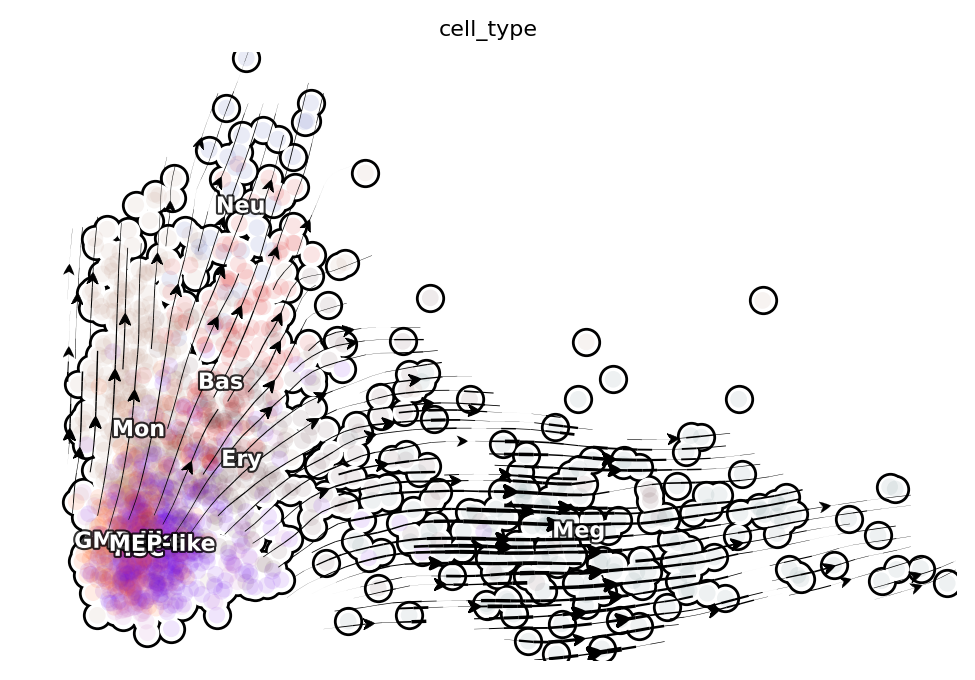

In [4]:
pca_dim = [0, 1]
dyn.pl.streamline_plot(
    adata_labeling,
    color="cell_type",
    use_smoothed=False,
    cmap="bwr",
    basis="pca",
    sym_c=True,
    x=pca_dim[0],
    y=pca_dim[1],
    frontier=True,
    sort="abs",
    alpha=0.2,
    pointsize=0.1,
    despline=True,
    despline_sides=["right", "top"],
    deaxis=False,
    save_show_or_return="return",
)


In [5]:
HSC_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "HSC")
Meg_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Meg")
Ery_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Ery")
Bas_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Bas")
Mon_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Mon")
Neu_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Neu")


In [6]:
# dyn.pd.fate(adata_labeling, init_cells=adata_labeling.obs_names[Mon_cells[0]], basis='pca', direction='backward', interpolation_num=500)
dyn.pd.fate(
    adata_labeling,
    init_cells=adata_labeling.obs_names[Meg_cells[0]],
    basis="pca",
    direction="backward",
    interpolation_num=500,
)


uniformly sampling points along a trajectory: 100%|██████████| 1/1 [00:00<00:00, 82.51it/s]


AnnData object with n_obs × n_vars = 1947 × 1956
    obs: 'batch', 'time', 'cell_type', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'acceleration_pca', 'curvature_pca', 'n_counts', 'mt_frac', 'jacobian_det_pca', 'manual_selection', 'divergence_pca', 'curv_leiden', 'curv_louvain', 'SPI1->GATA1_jacobian', 'jacobian', 'umap_ori_leiden', 'umap_ori_louvain', 'umap_ddhodge_div', 'umap_ddhodge_potential', 'curl_umap', 'divergence_umap', 'acceleration_umap', 'control_point_umap_ori', 'inlier_prob_umap_ori', 'obs_vf_angle_umap_ori', 'curvature_umap_ori'
    var: 'gene_name', 'gene_id', 'nCells', 'nCounts', 'pass_basic

In [7]:
adata_labeling.uns["fate_pca"]


{'init_states': array([[ 5.2919745 , -1.6043311 ,  0.19472672, -0.6521011 , -0.3910545 ,
         -0.17425747, -0.7500424 ,  1.9489013 , -0.62630427,  0.435594  ,
          0.8112104 , -0.31494737, -0.23104656,  0.1572339 , -0.6964127 ,
          0.8587724 , -0.38267198,  0.0734547 , -0.5838866 , -0.14543599,
         -0.44422174,  0.07856439,  0.46921268,  0.00724712,  0.8368773 ,
          0.03474469, -0.24431682,  0.23370868, -0.06652449, -0.06224704]],
       dtype=float32),
 'init_cells': 'CCATCCTGTGGA-JL12_0',
 'average': False,
 't': [[-0.09209527369054389,
   -0.1840362526337344,
   -0.2759487227556464,
   -0.3678611928775584,
   -0.4597736629994704,
   -0.5516861331213825,
   -0.6435986032432945,
   -0.7355110733652065,
   -0.8274235434871184,
   -0.9193360136090304,
   -1.0112484837309423,
   -1.1031609538528542,
   -1.2038043729783503,
   -1.3291018572815356,
   -1.454399341584721,
   -1.5796968258879063,
   -1.7049943101910916,
   -1.830291794494277,
   -1.9555892787974622,

In [8]:
adata_labeling.uns["fate_pca"]["prediction"][0]


array([[ 5.25701785,  5.22204597,  5.18701856, ..., -9.9033362 ,
        -9.93557093, -9.96776573],
       [-1.60646992, -1.60857623, -1.61065363, ..., -2.84942146,
        -2.84611685, -2.84281243],
       [ 0.19787256,  0.20107412,  0.20433522, ...,  3.06745094,
         3.07789704,  3.08834668],
       ...,
       [ 0.23255756,  0.23140911,  0.23026214, ...,  0.68195221,
         0.6822364 ,  0.68251551],
       [-0.06629712, -0.06608548, -0.06588903, ..., -1.28902938,
        -1.29009673, -1.29116093],
       [-0.06162954, -0.06102728, -0.06043941, ..., -0.32718502,
        -0.32672794, -0.32626966]])

In [9]:
dyn.pd.fate(
    adata_labeling,
    # init_cells=adata_labeling.obs_names[Meg_cells[0]],
    init_cells=adata_labeling.obs_names[Meg_cells[2]],
    basis="pca",
    direction="backward",
    interpolation_num=500,
)


uniformly sampling points along a trajectory: 100%|██████████| 1/1 [00:00<00:00, 78.83it/s]


AnnData object with n_obs × n_vars = 1947 × 1956
    obs: 'batch', 'time', 'cell_type', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'new_Size_Factor', 'initial_new_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'leiden', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_div', 'pca_ddhodge_potential', 'acceleration_pca', 'curvature_pca', 'n_counts', 'mt_frac', 'jacobian_det_pca', 'manual_selection', 'divergence_pca', 'curv_leiden', 'curv_louvain', 'SPI1->GATA1_jacobian', 'jacobian', 'umap_ori_leiden', 'umap_ori_louvain', 'umap_ddhodge_div', 'umap_ddhodge_potential', 'curl_umap', 'divergence_umap', 'acceleration_umap', 'control_point_umap_ori', 'inlier_prob_umap_ori', 'obs_vf_angle_umap_ori', 'curvature_umap_ori'
    var: 'gene_name', 'gene_id', 'nCells', 'nCounts', 'pass_basic

In [10]:
adata_labeling.uns["fate_pca"].keys(), adata_labeling.uns["fate_pca"]


(dict_keys(['init_states', 'init_cells', 'average', 't', 'prediction', 'VecFld_true', 'genes']),
 {'init_states': array([[ 7.091581  , -0.7870671 , -0.10020483, -2.1666603 , -0.70837826,
           0.9354968 ,  1.155709  , -1.1218834 , -0.96981585,  0.7737026 ,
          -0.3388199 , -0.05113704, -0.28078598, -1.1127218 ,  0.44130117,
          -0.8993704 ,  0.44900474,  0.01669051,  0.32672876, -0.5660211 ,
           0.6218931 ,  0.2717921 , -1.010213  ,  0.04973401, -0.72466844,
          -0.61323094,  0.22264181, -0.40271127, -0.11476172, -0.30153838]],
        dtype=float32),
  'init_cells': 'CTCTTAAAAGAG-JL12_0',
  'average': False,
  't': [[-0.22232868729082816,
    -0.4376615382142769,
    -0.6529943891377259,
    -0.8683272400611748,
    -1.083660090984624,
    -1.2989929419080735,
    -1.5069058902713115,
    -1.6647802440177495,
    -1.8226545977641875,
    -1.9805289515106255,
    -2.1384033052570635,
    -2.2962776590035014,
    -2.4541520127499394,
    -2.6120263664963774

In [11]:
adata_labeling.uns["fate_pca"]["prediction"][0].shape, len(
    adata_labeling.uns["fate_pca"]["t"][0],
)


((30, 500), 500)

In [12]:
from anndata import AnnData
from scipy.sparse import csr_matrix
from dynamo.vectorfield.utils import vector_transformation


path_id = 0
dyn.tools.utils.nearest_neighbors(
    adata_labeling.uns["fate_pca"]["prediction"][path_id].T[0, :], adata_labeling.obsm["X_pca"], 5
)[0][1]

dyn.tools.utils.nearest_neighbors(
    adata_labeling.uns["fate_pca"]["prediction"][path_id].T[140, :], adata_labeling.obsm["X_pca"], 5
)


vec_dict, vecfld = dyn.vf.utils.vecfld_from_adata(adata_labeling, basis="pca")


vector_field_class = dyn.vf.SvcVectorField()
vector_field_class.from_adata(adata_labeling, basis="pca")

X_data = adata_labeling.uns["fate_pca"]["prediction"][path_id].T[:140, :]
vel_norm = vector_field_class.func(X_data)
acc_norm, acc_mat = vector_field_class.compute_acceleration(X=X_data)
curv_norm, curv_mat = vector_field_class.compute_curvature(X=X_data)
div = vector_field_class.compute_divergence(X=X_data)

Jac_func = vector_field_class.get_Jacobian()
Js = Jac_func(X_data)

X_data.shape, Js.shape, adata_labeling.uns["fate_pca"]["prediction"][path_id].T.shape
adata_labeling.uns["PCs"].shape, adata_labeling.uns["pca_mean"].shape
Jacobian = dyn.vf.utils.subset_jacobian_transformation(Js, adata_labeling.uns["PCs"], adata_labeling.uns["PCs"])


|-----> [Calculating acceleration] in progress: 100.0000%
|-----> [Calculating acceleration] finished [0.0305s]
|-----> [Calculating acceleration] in progress: 100.0000%
|-----> [Calculating acceleration] finished [0.0330s]
|-----> [Calculating curvature] in progress: 100.0000%
|-----> [Calculating curvature] finished [0.0318s]


Transforming subset Jacobian: 100%|██████████| 140/140 [00:04<00:00, 34.28it/s]


In [13]:
# project the expression state back to higher dimension
exprs = dyn.prediction.utils.pca_to_expr(X_data, adata_labeling.uns["PCs"], mean=adata_labeling.uns["pca_mean"])
exprs.shape


(140, 1956)

In [14]:
trajectory_adata = AnnData(
    X=exprs, layers={"M_t": csr_matrix(exprs)}, var=adata_labeling[:, adata_labeling.var.use_for_pca].var
)

trajectory_adata.layers["velocity"] = csr_matrix(vector_transformation(vel_norm, adata_labeling.uns["PCs"]))
trajectory_adata.layers["acceleration"] = vector_transformation(acc_mat, adata_labeling.uns["PCs"])
trajectory_adata.layers["curvature"] = vector_transformation(curv_mat, adata_labeling.uns["PCs"])

adata_labeling.uns["jacobian_pca"].keys(), X_data.shape[0]
trajectory_adata.uns["jacobian_pca"] = {
    "cell_idx": np.arange(X_data.shape[0]),
    "effectors": trajectory_adata.var_names,
    "jacobian": Js,
    "jacobian_gene": Jacobian,
    "regulators": trajectory_adata.var_names,
}


In [15]:
trajectory_adata.obs["integral_time"] = adata_labeling.uns["fate_pca"]["t"][path_id][: X_data.shape[0]]


In [16]:
dyn.pp.recipe_monocle(trajectory_adata)


|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> <insert> pass_basic_filter to obs in AnnData Object.
|-----> 140 cells passed basic filters.
|-----> filtering gene...
|-----> <insert> pass_basic_filter to var in AnnData Object.
|-----> 32 genes passed basic filters.
|-----> calculating size factor...
|-----? only 32 genes passed basic filte

In [17]:
trajectory_adata.var_names


Index(['FUCA2', 'HECW1', 'MAD1L1', 'CFLAR', 'SARM1', 'CAMKK1', 'ARHGAP33',
       'SLC4A1', 'MPO', 'ITGA3',
       ...
       'AC020651.2', 'AL355999.1', 'AC016168.4', 'AL353576.1', 'AP000926.2',
       'AC108519.1', 'AC004470.2', 'DUS4L-BCAP29', 'AL592295.6', 'AL353671.1'],
      dtype='object', length=1956)

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [5.9700s]


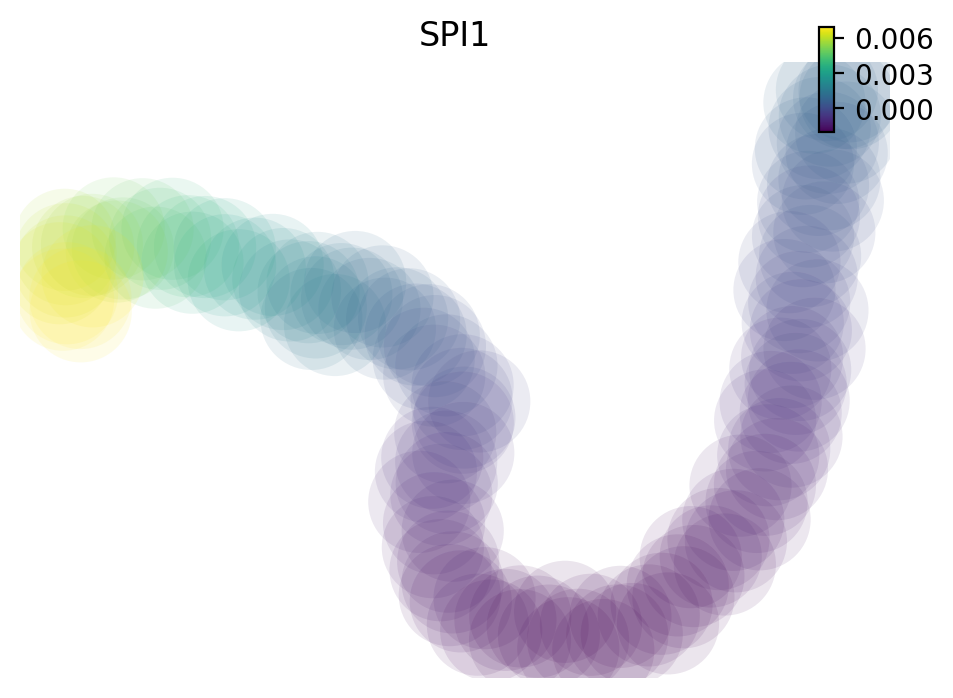

In [18]:
dyn.tl.reduceDimension(trajectory_adata)
dyn.pl.umap(trajectory_adata, color="SPI1")


Text(0.5, 0, 'integration time')

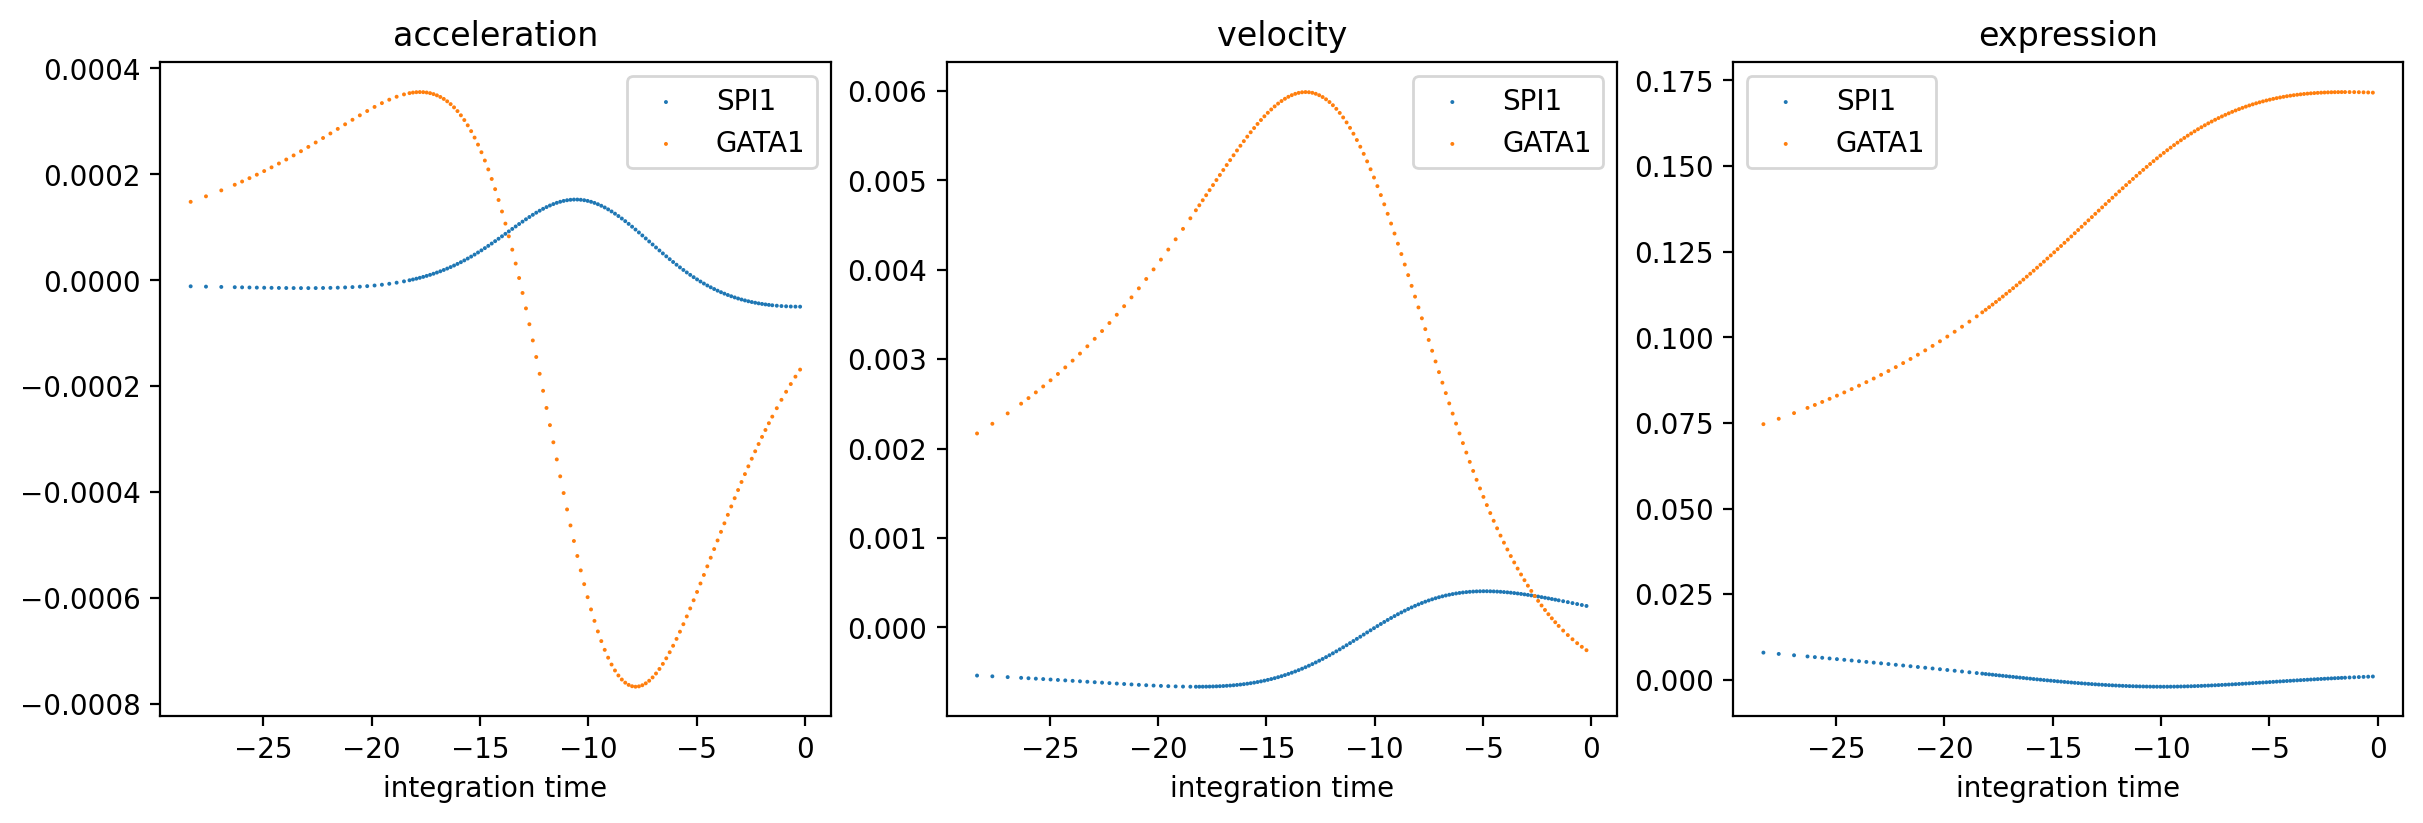

In [19]:
genes = ["SPI1", "GATA1"]
integral_time = trajectory_adata.obs.integral_time[::-1]
expression = trajectory_adata[:, genes].layers["M_t"].A[::-1, :]
velocity = trajectory_adata[:, genes].layers["velocity"].A[::-1, :]
acceleration = trajectory_adata[:, genes].layers["acceleration"].A[::-1, :]

fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(12, 4))
sns.scatterplot(integral_time, acceleration[:, 0], s=2, ax=f1_axes[0], ec=None, label="SPI1")
sns.scatterplot(integral_time, acceleration[:, 1], s=2, ax=f1_axes[0], ec=None, label="GATA1")
f1_axes[0].set_title("acceleration")
f1_axes[0].set_xlabel("integration time")
sns.scatterplot(integral_time, velocity[:, 0], s=2, ax=f1_axes[1], ec=None, label="SPI1")
sns.scatterplot(integral_time, velocity[:, 1], s=2, ax=f1_axes[1], ec=None, label="GATA1")
f1_axes[1].set_title("velocity")
f1_axes[1].set_xlabel("integration time")
sns.scatterplot(integral_time, expression[:, 0], s=2, ax=f1_axes[2], ec=None, label="SPI1")
sns.scatterplot(integral_time, expression[:, 1], s=2, ax=f1_axes[2], ec=None, label="GATA1")
f1_axes[2].set_title("expression")
f1_axes[2].set_xlabel("integration time")


Text(0.5, 0, 'GATA1 ($M_t$)')

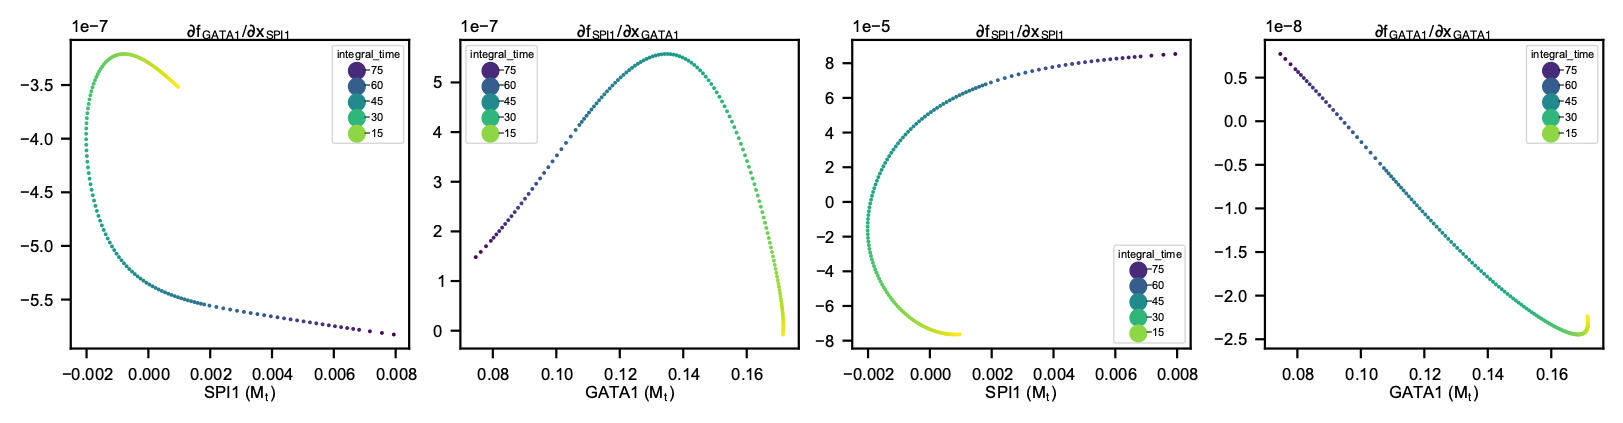

In [20]:
dyn.configuration.set_pub_style()
regulators, effectors = list(adata_labeling.uns["jacobian_pca"]["regulators"]), list(
    adata_labeling.uns["jacobian_pca"]["effectors"]
)
spi1_ind, gata1_ind = regulators.index("SPI1"), effectors.index("GATA1")
fig1, f1_axes = plt.subplots(ncols=4, nrows=1, constrained_layout=True, figsize=(8, 2))
expression = trajectory_adata[:, ["SPI1", "GATA1"]].layers["M_t"].A[::-1, :]

sns.scatterplot(
    expression[:, 0],
    Jacobian[gata1_ind, spi1_ind, ::-1],
    hue=integral_time * 3,
    palette="viridis",
    ax=f1_axes[0],
    ec=None,
    s=2,
)
f1_axes[0].set_title(r"$\partial f_{GATA1}/\partial x_{SPI1}$")
f1_axes[0].set_xlabel(r"SPI1 ($M_t$)")
sns.scatterplot(
    expression[:, 1],
    Jacobian[spi1_ind, gata1_ind, ::-1],
    hue=integral_time * 3,
    palette="viridis",
    ax=f1_axes[1],
    ec=None,
    s=2,
)
f1_axes[1].set_title(r"$\partial f_{SPI1}/\partial x_{GATA1}$")
f1_axes[1].set_xlabel(r"GATA1 ($M_t$)")
sns.scatterplot(
    expression[:, 0],
    Jacobian[spi1_ind, spi1_ind, ::-1],
    hue=integral_time * 3,
    palette="viridis",
    ax=f1_axes[2],
    ec=None,
    s=2,
)
f1_axes[2].set_title(r"$\partial f_{SPI1}/\partial x_{SPI1}$")
f1_axes[2].set_xlabel(r"SPI1 ($M_t$)")
sns.scatterplot(
    expression[:, 1],
    Jacobian[gata1_ind, gata1_ind, ::-1],
    hue=integral_time * 3,
    palette="viridis",
    ax=f1_axes[3],
    ec=None,
    s=2,
)
f1_axes[3].set_title(r"$\partial f_{GATA1}/\partial x_{GATA1}$")
f1_axes[3].set_xlabel(r"GATA1 ($M_t$)")


In [21]:
dyn.configuration.set_pub_style(scaler=2)
dyn.pl.response(
    adata_labeling,
    np.array([["SPI1", "SPI1"], ["SPI1", "GATA1"], ["GATA1", "SPI1"], ["GATA1", "GATA1"]]),
    ykey="alpha",
    log=False,
    drop_zero_cells=False,
    grid_num=20,
)


Exception: adata.layers doesn't have ('M_t', 'alpha') layers. Please specify the correct layers or perform relevant preprocessing and vector field analyses first.